In [2]:
import pandas as pd
import os

pd.set_option("display.max_rows", 200)

# Get all files in the 'concat' subdirectory of the current working directory
files = os.listdir('concat')

print(files)
# Step 1: Identify Unique Proteins

proteins = set(file.split("_")[3] for file in files if len(file.split("_")) >= 4)

# Initialize an empty DataFrame for the final combined data
combined_df = pd.DataFrame()

# Step 2 & 3: Process each protein
for protein in proteins:
  # Initialize empty lists to store DataFrames for each type
  enrichment_metrics_dfs = []
  log_aucs_dfs = []
  roc_metrics_dfs = []

  # Filter files for the current protein and process according to type
  for file in files:
    if protein in file:
      if "enrichment_metrics" in file:
        enrichment_metrics_dfs.append(pd.read_csv(file))
      elif "log_aucs" in file:
        log_aucs_dfs.append(pd.read_csv(file))
      elif "roc_metrics" in file:
        roc_metrics_dfs.append(pd.read_csv(file))

  # Concatenate DataFrames of the same type
  enrichment_df = pd.concat(enrichment_metrics_dfs)
  log_aucs_df = pd.concat(log_aucs_dfs)
  roc_metrics_df = pd.concat(roc_metrics_dfs)

  # Step 4: Merge the three DataFrames for each protein
  merged_df = enrichment_df.merge(
    log_aucs_df, on=["Protein", "Strain Energy Cutoff"]
  ).merge(roc_metrics_df, on=["Protein", "Strain Energy Cutoff"])

  # Append to the final DataFrame
  combined_df = pd.concat([combined_df, merged_df], ignore_index=True)

# Resulting combined_df contains all data
display(combined_df)

# Save the final DataFrame to a CSV file
# combined_df.to_csv("combined_data.csv", index=False)

data = combined_df

FileNotFoundError: [Errno 2] No such file or directory: 'concat'

In [ ]:
# Get all files in the 'concat' subdirectory of the current working directory
files = os.listdir('concat')

/var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_53943/3340971315.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=data, x="Strain Energy Cutoff", y="EF1%", hue="Protein", ci=None)


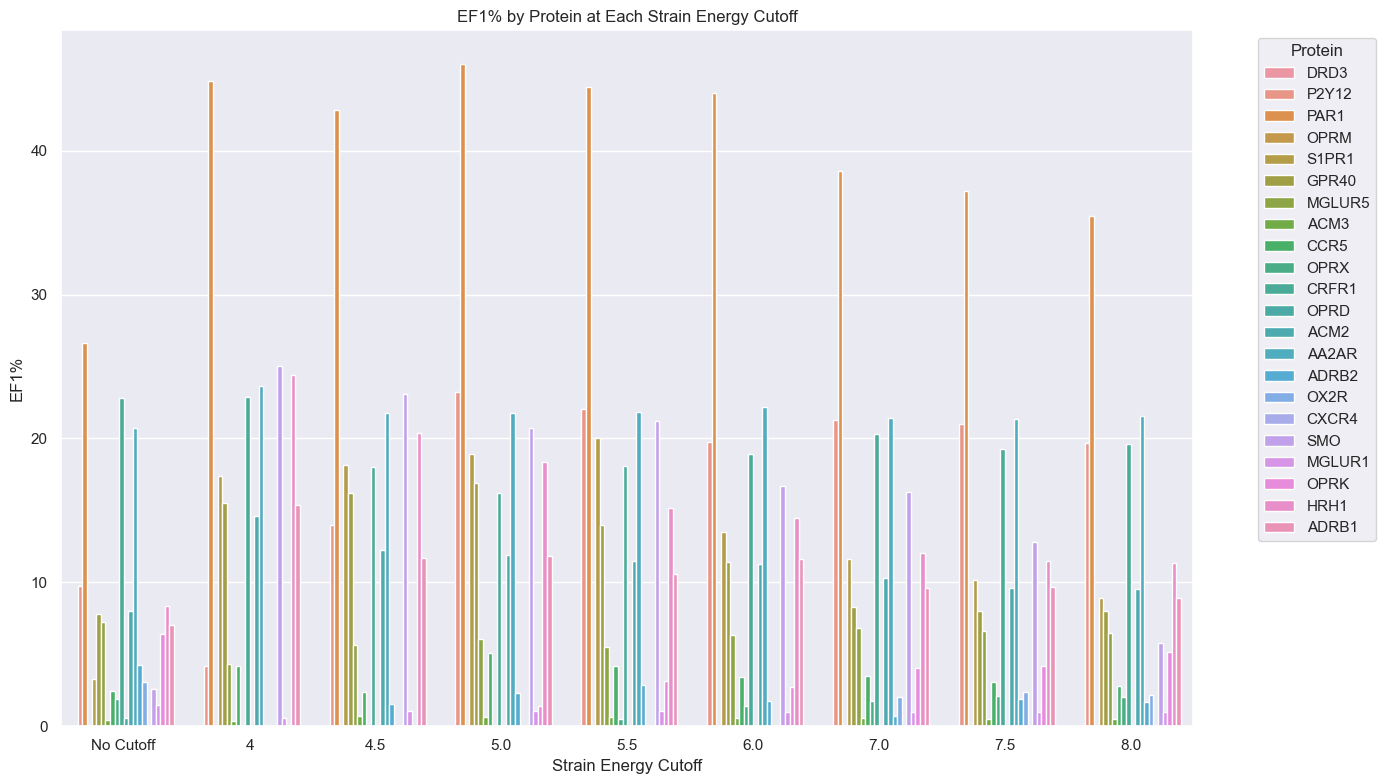

In [25]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Create a bar plot for the 'EF1%' metric
ax = sns.barplot(data=data, x="Strain Energy Cutoff", y="EF1%", hue="Protein", ci=None)

# Place the legend outside the plot
plt.legend(title="Protein", bbox_to_anchor=(1.05, 1), loc="upper left")

# Add labels and title
plt.xlabel("Strain Energy Cutoff")
plt.ylabel("EF1%")
plt.title("EF1% by Protein at Each Strain Energy Cutoff")

# Show the plot
plt.tight_layout()
plt.show()

/var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_53943/1998993404.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=data, x="Strain Energy Cutoff", y="EF5%", hue="Protein", ci=None)


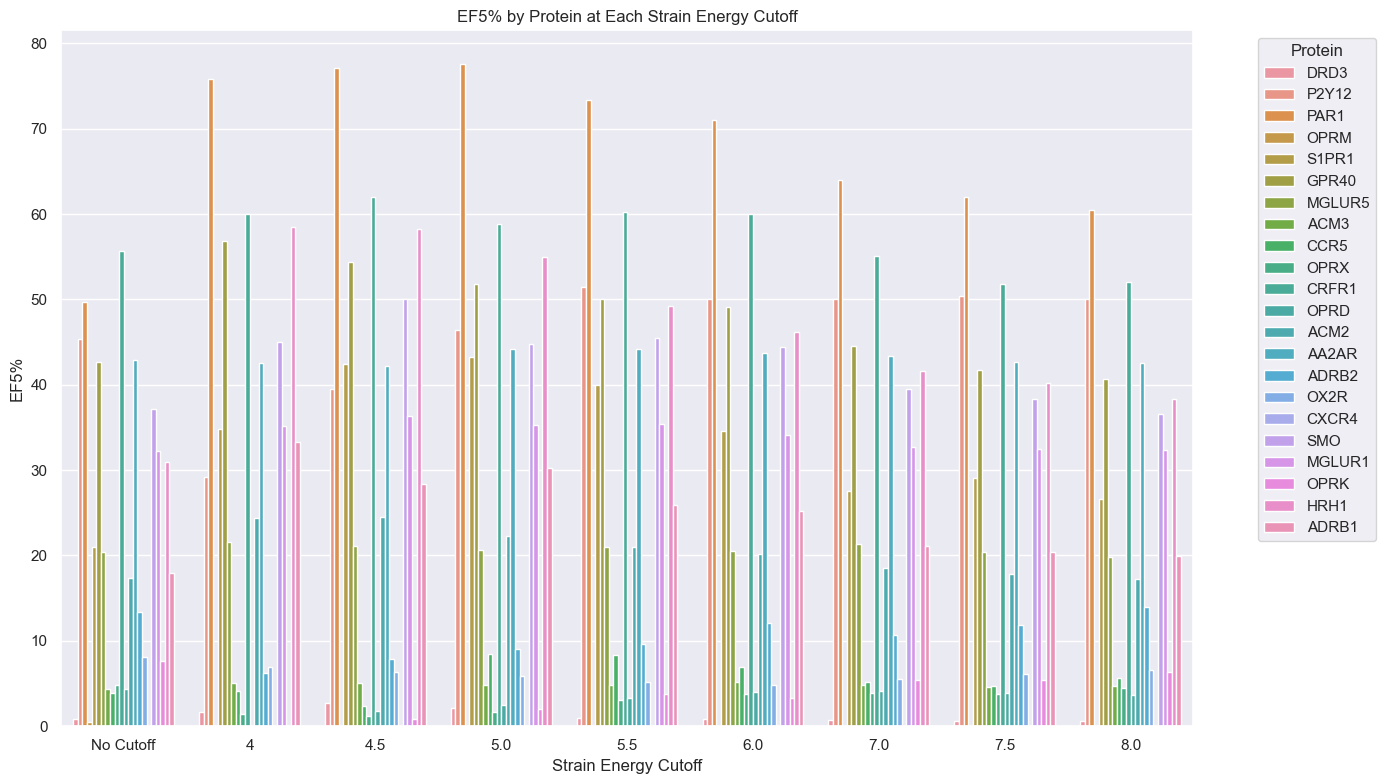

In [26]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Create a bar plot for the 'EF1%' metric
ax = sns.barplot(data=data, x="Strain Energy Cutoff", y="EF5%", hue="Protein", ci=None)

# Place the legend outside the plot
plt.legend(title="Protein", bbox_to_anchor=(1.05, 1), loc="upper left")

# Add labels and title
plt.xlabel("Strain Energy Cutoff")
plt.ylabel("EF5%")
plt.title("EF5% by Protein at Each Strain Energy Cutoff")

# Show the plot
plt.tight_layout()
plt.show()

/var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_53943/3592951368.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


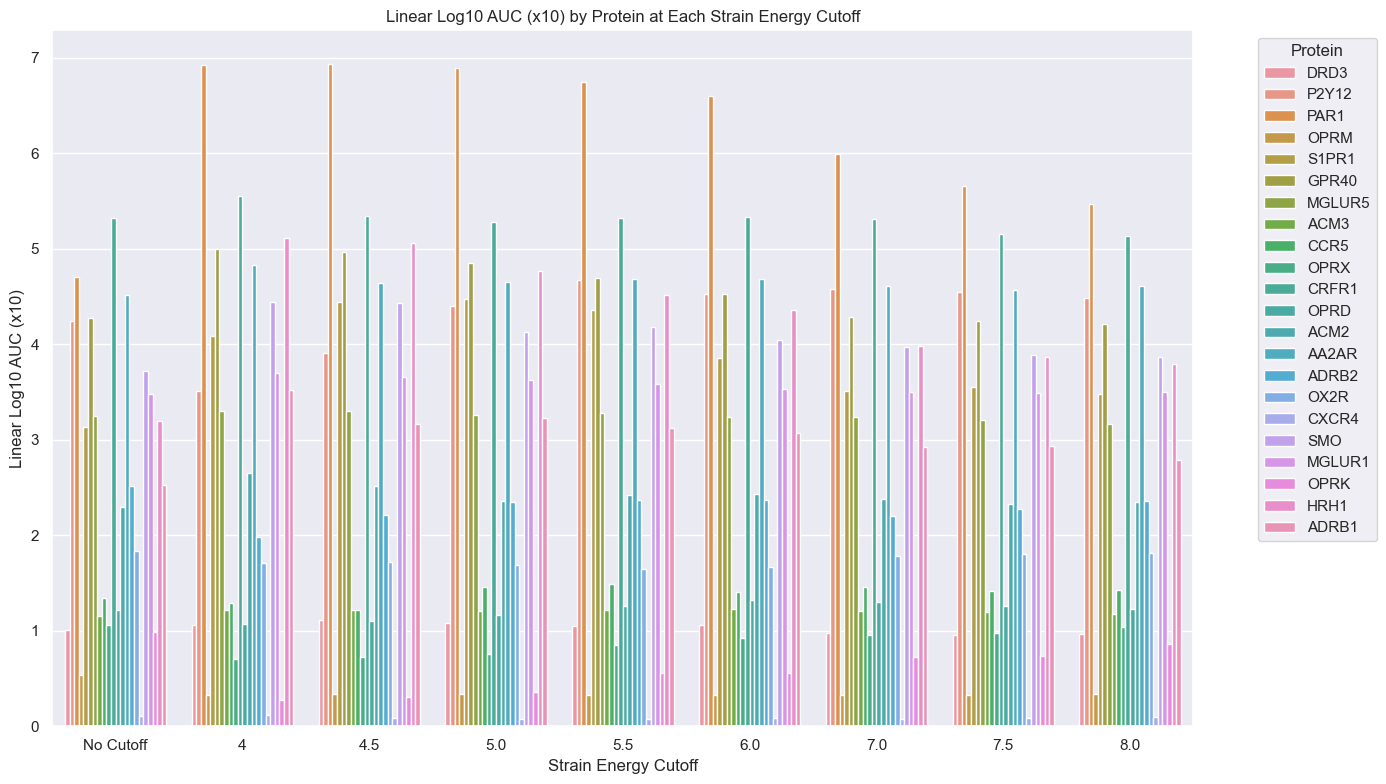

In [27]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Create a bar plot for the 'EF1%' metric
ax = sns.barplot(
    data=data,
    x="Strain Energy Cutoff",
    y="Linear Log10 AUC (x10)",
    hue="Protein",
    ci=None,
)

# Place the legend outside the plot
plt.legend(title="Protein", bbox_to_anchor=(1.05, 1), loc="upper left")

# Add labels and title
plt.xlabel("Strain Energy Cutoff")
plt.ylabel("Linear Log10 AUC (x10)")
plt.title("Linear Log10 AUC (x10) by Protein at Each Strain Energy Cutoff")

# Show the plot
plt.tight_layout()
plt.show()

/var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_53943/1279366284.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


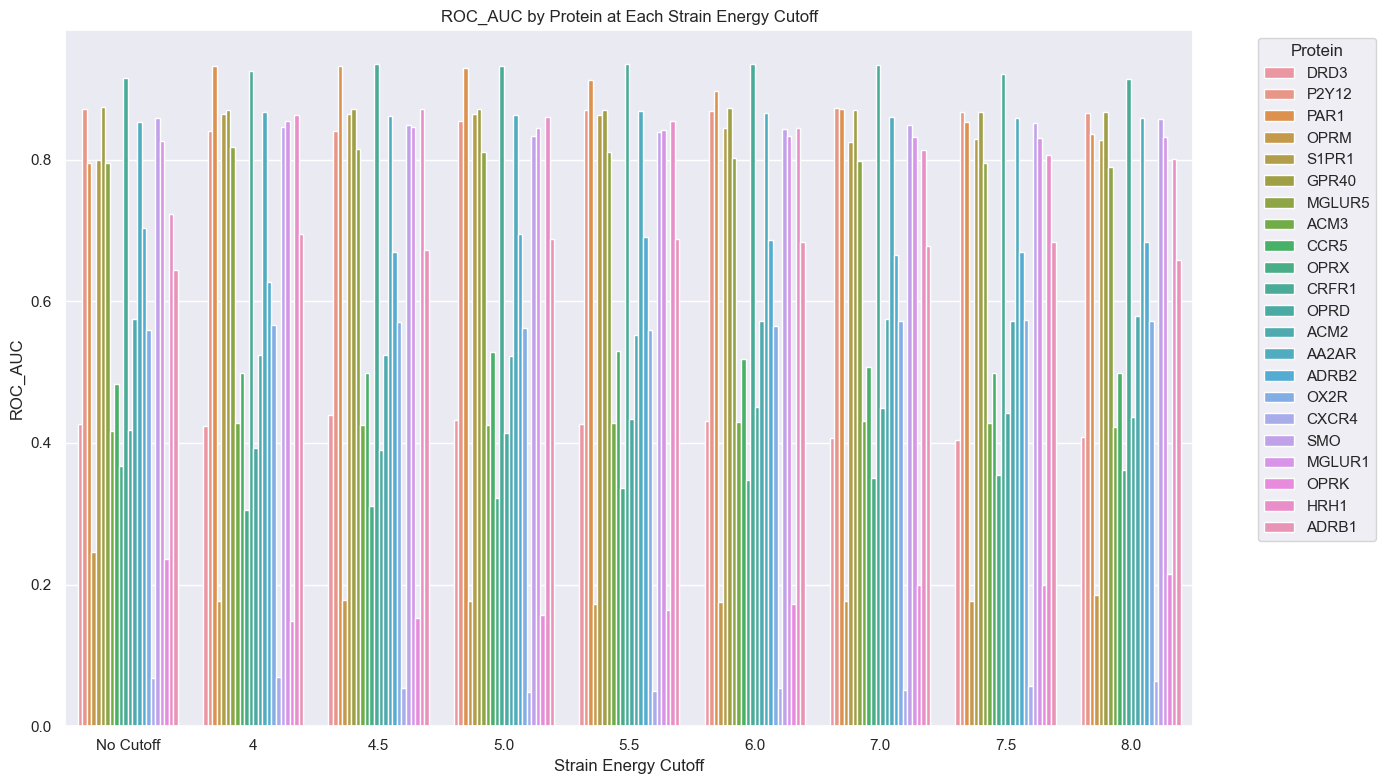

In [28]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Create a bar plot for the 'EF1%' metric
ax = sns.barplot(
    data=data,
    x="Strain Energy Cutoff",
    y="ROC_AUC",
    hue="Protein",
    ci=None,
)

# Place the legend outside the plot
plt.legend(title="Protein", bbox_to_anchor=(1.05, 1), loc="upper left")

# Add labels and title
plt.xlabel("Strain Energy Cutoff")
plt.ylabel("ROC_AUC")
plt.title("ROC_AUC by Protein at Each Strain Energy Cutoff")

# Show the plot
plt.tight_layout()
plt.show()

# We need to get delta values to baseline and find a way to better represent the proteins as the color map is insufficient 
## probably need box and whisker plots so we can understand the outliers in the averages as well. 
## need input from team re: what to do with pareto


In [29]:
combined_df

,Protein,Strain Energy Cutoff,EF1%,EF5%,Linear Log10 AUC (x10),Delta Linear Log10 AUC (x10),ROC_AUC,Actives,Total Count
0,DRD3,No Cutoff,0.000000,0.836820,1.012564,0.000000,0.426173,239,15265
1,DRD3,4,0.000000,1.666667,1.062163,0.049599,0.424349,60,5079
2,DRD3,4.5,0.000000,2.702703,1.108910,0.096346,0.439641,74,5994
3,DRD3,5.0,0.000000,2.083333,1.082919,0.070356,0.432111,96,6966
4,DRD3,5.5,0.000000,0.909091,1.045312,0.032748,0.426455,110,7895
5,DRD3,6.0,0.000000,0.813008,1.055611,0.043048,0.430619,123,8731
6,DRD3,7.0,0.000000,0.714286,0.973224,-0.039340,0.407467,140,10343
7,DRD3,7.5,0.000000,0.653595,0.954048,-0.058516,0.404492,153,11024
8,DRD3,8.0,0.000000,0.625000,0.965635,-0.046928,0.408293,160,11642
9,P2Y12,No Cutoff,9.756098,45.365854,4.247872,0.000000,0.871747,205,11432
